# Part I COVID-19 Coronavirus Pandemic Dataset (Data Exploration)

## by (Joris Axel DA MATHA)

## About Dataset
>Hello dear reader, 
The 2019–20 coronavirus pandemic is an ongoing global pandemic of coronavirus disease 2019 (COVID-19) caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus first emerged in Wuhan, Hubei, China, in December 2019. On 11 March 2020, the World Health Organization declared the outbreak a pandemic. As of 11 March 2020, over 126,000 cases have been confirmed in more than 110 countries and territories, with major outbreaks in mainland China, Italy, South Korea, and Iran. More than 4,600 have died from the disease and 67,000 have recovered. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import requests
from bs4 import BeautifulSoup as bf

## Data Augmentation 
I tried to add more content in this analysis in order to compare the results of this year (XX/12/22) and data provided on Kaggle by `AMAN CHAUHAN`.This dataset has information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this data was scrapped from [Source](https://www.worldometers.info/coronavirus/). This data was solely for education purposes only. But for my own experience i tried to gather more data to make more analysis. An other thing is that data is updated each day. So with data of 2022 now i would compare the situation with past.

![Covid](https://france3-regions.francetvinfo.fr/image/wsuJ2rtfoQYyc3wIHypmO9JyNBU/600x400/regions/2020/06/09/5edfa280c0ba6_mona-4723088.jpg)


>If you want more visibility about my data augmentation process please check the `Coronavirus_Data_Augmentation.ipynb`.
Now let's correct the issues in the data. I will use as reference the last data i gathered from Worldometers. To take a look please check my [github repository](https://github.com/DATaxelBase/Coronavirus_dataset.git)

In [2]:
df = pd.read_csv("./Data_Gathering/Coronavirus_22_12_09.csv")
df.head(6)

,Id,country,total_cases,new_cases,total_death,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
0,1,USA,"101,213,638",0,"1,109,394",0,"98,461,586",0,"1,642,658","3,746","302,306","3,314","1,144,042,147","3,417,037","334,805,269",North America
1,2,India,"44,675,509",0,"530,653",0,"44,139,558",0,"5,298",698,"31,761",377,"907,809,042","645,378","1,406,631,776",Asia
2,3,France,"38,331,430",0,"159,517",0,"37,128,030",0,"1,043,883",869,"584,459","2,432","271,490,188","4,139,547","65,584,518",Europe
3,4,Germany,"36,726,061",0,"158,851",0,"36,042,800","27,000","524,410","1,406","437,822","1,894","122,332,384","1,458,359","83,883,596",Europe
4,5,Brazil,"35,563,044",0,"690,739",0,"34,354,889",0,"517,416","8,318","165,138","3,207","63,776,166","296,146","215,353,593",South America
5,6,S. Korea,"27,611,555","62,734","30,975",67,"26,550,948","23,030","1,029,632",442,"537,923",603,"15,804,065","307,892","51,329,899",Asia


#### Let's insure the data were well extracted 


In [3]:
df_null_values =[]
cols = list(df.columns)
for i in cols:
    df_null_values.append({i:df[i].isnull().sum()})
df_null_values

[{'Id': 0},
 {'country': 6},
 {'total_cases': 0},
 {'new_cases': 0},
 {'total_death': 0},
 {'new_deaths': 0},
 {'total_recovered': 0},
 {'new_recovered': 0},
 {'active_cases': 0},
 {'serious_critical': 0},
 {'total_cases_per_million': 0},
 {'deaths_per_million': 0},
 {'total_tests': 0},
 {'tests_per_million': 0},
 {'population': 3},
 {'continent': 2}]

In [4]:
df.describe()

,Id,new_deaths
count,230.000000,230.000000
mean,115.500000,2.360870
std,66.539462,16.682372
min,1.000000,0.000000
25%,58.250000,0.000000
50%,115.500000,0.000000
75%,172.750000,0.000000
max,230.000000,228.000000


In [5]:
df_empty_country = df[df['country'].isnull()]
df_empty_country

,Id,country,total_cases,new_cases,total_death,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
92,93,NaN,"477,305",0,903,0,"418,572",0,"57,830",10,"525,631",994,"1,603,660","1,766,027","908,061",Africa
153,154,NaN,"45,986",0,295,0,"44,720",0,971,3,"277,812","1,782","496,693","3,000,640","165,529",North America
172,173,NaN,"23,360",0,138,0,"23,102",0,120,"17,058",101,"278,529","203,391",0,"1,369,429",Asia
202,203,NaN,"8,848",0,176,0,"8,642",0,30,6,"4,288",85,"145,231","70,385","2,063,367",Africa
224,225,NaN,712,0,13,0,699,0,0,0,0,0,0,0,NaN,NaN
228,229,NaN,9,0,2,0,7,0,0,0,0,0,0,0,NaN,NaN


In [6]:
df_empty_pop = df[df['population'].isnull()]
df_empty_pop

,Id,country,total_cases,new_cases,total_death,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
224,225,NaN,712,0,13,0,699,0,0,0,0,0,0,0,NaN,NaN
228,229,NaN,9,0,2,0,7,0,0,0,0,0,0,0,NaN,NaN
229,230,China,"357,652","3,635","5,235",0,"309,259","3,743","43,158",143,247,4,"160,000,000","110,461",NaN,Asia


In [7]:
df_empty_cont = df[df['continent'].isnull()]
df_empty_cont

,Id,country,total_cases,new_cases,total_death,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
224,225,NaN,712,0,13,0,699,0,0,0,0,0,0,0,NaN,NaN
228,229,NaN,9,0,2,0,7,0,0,0,0,0,0,0,NaN,NaN


In [8]:
df_cols_types =[]
for i in cols:
    df_cols_types.append({i:type(df[i].loc[0])})
df_cols_types


[{'Id': numpy.int64},
 {'country': str},
 {'total_cases': str},
 {'new_cases': str},
 {'total_death': str},
 {'new_deaths': numpy.int64},
 {'total_recovered': str},
 {'new_recovered': str},
 {'active_cases': str},
 {'serious_critical': str},
 {'total_cases_per_million': str},
 {'deaths_per_million': str},
 {'total_tests': str},
 {'tests_per_million': str},
 {'population': str},
 {'continent': str}]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       230 non-null    int64 
 1   country                  224 non-null    object
 2   total_cases              230 non-null    object
 3   new_cases                230 non-null    object
 4   total_death              230 non-null    object
 5   new_deaths               230 non-null    int64 
 6   total_recovered          230 non-null    object
 7   new_recovered            230 non-null    object
 8   active_cases             230 non-null    object
 9   serious_critical         230 non-null    object
 10  total_cases_per_million  230 non-null    object
 11  deaths_per_million       230 non-null    object
 12  total_tests              230 non-null    object
 13  tests_per_million        230 non-null    object
 14  population               227 non-null    o

#### Let's make a first analysis on the data provided by `AMAN CHAUHAN`


In [10]:
df_cov = pd.read_csv('./Data_Gathering/Covid Live.csv')
df_cov.head(6)

,#,"Country,\r\nOther",Total\r\nCases,Total\r\nDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
5,6,S. Korea,"24,769,101","28,406",42.0,"24,013,461","727,234",352,"482,547",553,"15,804,065","307,892","51,329,899"


In [11]:
df_cov_null_values =[]
cols_cov = list(df_cov.columns)
for i in cols_cov:
    df_cov_null_values.append({i:df_cov[i].isnull().sum()})
df_cov_null_values

[{'#': 0},
 {'Country,\r\nOther': 0},
 {'Total\r\nCases': 0},
 {'Total\r\nDeaths': 5},
 {'New\r\nDeaths': 227},
 {'Total\r\nRecovered': 16},
 {'Active\r\nCases': 15},
 {'Serious,\r\nCritical': 83},
 {'Tot Cases/\r\n1M pop': 2},
 {'Deaths/\r\n1M pop': 7},
 {'Total\r\nTests': 16},
 {'Tests/\r\n1M pop': 16},
 {'Population': 2}]

In [12]:
df_cov[df_cov['Country,\r\nOther'] == 'China']

,#,"Country,\r\nOther",Total\r\nCases,Total\r\nDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
107,108,China,"250,449","5,226",NaN,"242,254","2,969",36,173,4,"160,000,000","110,461","1,448,471,400"


In [13]:
df_cov_empty_pop = df_cov[df_cov['Population'].isnull()]
df_cov_empty_pop

,#,"Country,\r\nOther",Total\r\nCases,Total\r\nDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
224,225,Diamond Princess,712,13,NaN,699,0,NaN,NaN,NaN,NaN,NaN,NaN
229,230,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_cov_empty_death = df_cov[df_cov['Deaths/\r\n1M pop'].isnull()]
df_cov_empty_death

,#,"Country,\r\nOther",Total\r\nCases,Total\r\nDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
219,220,Falkland Islands,"1,886",NaN,NaN,"1,886",0,NaN,"532,919",NaN,"8,632","2,439,107","3,539"
221,222,Saint Helena,"1,355",NaN,NaN,2,"1,353",NaN,"221,586",NaN,NaN,NaN,"6,115"
224,225,Diamond Princess,712,13,NaN,699,0,NaN,NaN,NaN,NaN,NaN,NaN
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
229,230,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


## Assessing Data
In this section, i'm going to detect and document quality and tidiness issue if there is. 
    We have the followings columns in this dataset:

| **`Columns`**        | **`Description`**  |  
| ------------- |-------------:|
| Id   | ID of country |
| country       |Country name     |
| total_cases | Total number of cases   |
| total_death   | Total number of death |
| total_recovered      | Total number recovered  |
| new_recovered | Number of new recovered      |
| active_cases   | Covid active cases |
| serious_critical     | Covid serious and critical cases |
| total_cases_per_million      | Total number of cases per million on population  |
| deaths_per_million | Total number of deaths per million on population   |
| total_tests   | Total number of tests in country |
| tests_per_million      |Total number of tests per million on population   |
| population | Number of population  |
| continent   | Continent of country |

>First looks on data gathered (`Programatic assessment`). 
There are some missing values in 2022 dataset especially in country and population column. 

### Quality/Tidiness issues
1. Change the columns names on dataset provided on Kaggle to have the same as the 2022 columns.

2. Delete the new_cases and new_recovered columns in 2022 dataset.

3. In the 2022 dataset, fill the countries missing by appropriate content.

4. Replace None values by 0 in both datasets and especially for China in 2022 dataset check with original datas to set the population.

5. Delete countries (Diamond Princess; and MS Zaandam ) due to data unavailability for a lot of important columns.

6. Change the character strings and float present in the covid-related case listing columns into integers.

7. Add continent from 2022 data in 2019 set of data based on country.

8. Add the year column to differencify the two sets of data.

9. Concat the two set of datas 2019 and 2022.



## Cleaning Data

In [15]:
df1_clean = df.copy()
df2_clean = df_cov.copy()

### Issue #1:

In [16]:
print(df1_clean.columns.tolist())
df2_clean.columns.tolist()

['Id', 'country', 'total_cases', 'new_cases', 'total_death', 'new_deaths', 'total_recovered', 'new_recovered', 'active_cases', 'serious_critical', 'total_cases_per_million', 'deaths_per_million', 'total_tests', 'tests_per_million', 'population', 'continent']


['#',
 'Country,\r\nOther',
 'Total\r\nCases',
 'Total\r\nDeaths',
 'New\r\nDeaths',
 'Total\r\nRecovered',
 'Active\r\nCases',
 'Serious,\r\nCritical',
 'Tot Cases/\r\n1M pop',
 'Deaths/\r\n1M pop',
 'Total\r\nTests',
 'Tests/\r\n1M pop',
 'Population']

#### Define
>Uniformize columns name under simple terms in the data 2019. I will adopt simply the same as in 2022 data.

#### Code

In [17]:
df2_clean.rename(columns={'#':'Id','Country,\r\nOther':'country','Total\r\nCases':'total_cases','Total\r\nDeaths':'total_death','New\r\nDeaths':'new_deaths','Total\r\nRecovered':'total_recovered','Active\r\nCases':'active_cases','Serious,\r\nCritical':'serious_critical','Tot Cases/\r\n1M pop':'total_cases_per_million','Deaths/\r\n1M pop':'deaths_per_million','Total\r\nTests':'total_tests','Tests/\r\n1M pop':'tests_per_million','Population':'population'},inplace =True)

#### Test

In [18]:
df2_clean.columns.tolist()

['Id',
 'country',
 'total_cases',
 'total_death',
 'new_deaths',
 'total_recovered',
 'active_cases',
 'serious_critical',
 'total_cases_per_million',
 'deaths_per_million',
 'total_tests',
 'tests_per_million',
 'population']

***

### Issue #2:

In [19]:
df1_clean.columns.tolist()

['Id',
 'country',
 'total_cases',
 'new_cases',
 'total_death',
 'new_deaths',
 'total_recovered',
 'new_recovered',
 'active_cases',
 'serious_critical',
 'total_cases_per_million',
 'deaths_per_million',
 'total_tests',
 'tests_per_million',
 'population',
 'continent']

#### Define
>Delete the new_cases and new_recovered columns in 2022 dataset.

#### Code

In [20]:
df1_clean.drop(axis =1,columns=['new_cases','new_recovered'],inplace =True)

#### Test

In [21]:
df1_clean.columns.tolist()

['Id',
 'country',
 'total_cases',
 'total_death',
 'new_deaths',
 'total_recovered',
 'active_cases',
 'serious_critical',
 'total_cases_per_million',
 'deaths_per_million',
 'total_tests',
 'tests_per_million',
 'population',
 'continent']

***

### Issue #3:

In [22]:
df_empty_country

,Id,country,total_cases,new_cases,total_death,new_deaths,total_recovered,new_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
92,93,NaN,"477,305",0,903,0,"418,572",0,"57,830",10,"525,631",994,"1,603,660","1,766,027","908,061",Africa
153,154,NaN,"45,986",0,295,0,"44,720",0,971,3,"277,812","1,782","496,693","3,000,640","165,529",North America
172,173,NaN,"23,360",0,138,0,"23,102",0,120,"17,058",101,"278,529","203,391",0,"1,369,429",Asia
202,203,NaN,"8,848",0,176,0,"8,642",0,30,6,"4,288",85,"145,231","70,385","2,063,367",Africa
224,225,NaN,712,0,13,0,699,0,0,0,0,0,0,0,NaN,NaN
228,229,NaN,9,0,2,0,7,0,0,0,0,0,0,0,NaN,NaN


#### Define
>In the 2022 dataset, fill the countries missing by appropriate content.

#### Code

In [23]:
df1_clean['country'].loc[92] = 'Réunion'
df1_clean['country'].loc[153] = 'Curaçao'
df1_clean['country'].loc[172] = 'Timor-Leste'
df1_clean['country'].loc[202] = 'Guinea-Bissau'
df1_clean['country'].loc[224] = 'Diamond Princess'
df1_clean['country'].loc[228] = 'MS Zaandam'



C:\Users\SC00454\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Test

In [24]:
print(df1_clean.tail(5))
df1_clean.country.isnull().sum()


      Id         country total_cases total_death  new_deaths total_recovered  \
225  226            Niue         189           0           0             143   
226  227    Vatican City          29           0           0              29   
227  228  Western Sahara          10           1           0               9   
228  229      MS Zaandam           9           2           0               7   
229  230           China     357,652       5,235           0         309,259   

    active_cases serious_critical total_cases_per_million deaths_per_million  \
225           46          116,523                       0                  0   
226            0           36,295                       0                  0   
227            0               16                       2                  0   
228            0                0                       0                  0   
229       43,158              143                     247                  4   

     total_tests tests_per_million pop

0

***

### Issue #4:

In [25]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       230 non-null    int64 
 1   country                  230 non-null    object
 2   total_cases              230 non-null    object
 3   total_death              230 non-null    object
 4   new_deaths               230 non-null    int64 
 5   total_recovered          230 non-null    object
 6   active_cases             230 non-null    object
 7   serious_critical         230 non-null    object
 8   total_cases_per_million  230 non-null    object
 9   deaths_per_million       230 non-null    object
 10  total_tests              230 non-null    object
 11  tests_per_million        230 non-null    object
 12  population               227 non-null    object
 13  continent                228 non-null    object
dtypes: int64(2), object(12)
memory usage: 25.3

In [26]:
df1_clean[df1_clean.country == 'China']

,Id,country,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
229,230,China,"357,652","5,235",0,"309,259","43,158",143,247,4,"160,000,000","110,461",NaN,Asia


In [27]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       230 non-null    int64  
 1   country                  230 non-null    object 
 2   total_cases              230 non-null    object 
 3   total_death              225 non-null    object 
 4   new_deaths               3 non-null      float64
 5   total_recovered          214 non-null    object 
 6   active_cases             215 non-null    object 
 7   serious_critical         147 non-null    object 
 8   total_cases_per_million  228 non-null    object 
 9   deaths_per_million       223 non-null    object 
 10  total_tests              214 non-null    object 
 11  tests_per_million        214 non-null    object 
 12  population               228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


#### Define
>Replace None values by 0 in both datasets and especially for China in 2022 dataset check with original datas to set the population.

#### Code

In [28]:
#df1_clean['population'].loc[229] = df2_clean[df2_clean.country == 'China']['population']
df1_clean['population'].loc[229] = df2_clean[df2_clean.country == 'China']['population'].loc[107]


C:\Users\SC00454\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
df1_clean.fillna(0, inplace=True)
df2_clean.fillna(0,inplace = True)

#### Test

In [30]:
print(df1_clean[df1_clean.country == 'China'])
print(df1_clean.info())
print(df2_clean.info())

      Id country total_cases total_death  new_deaths total_recovered  \
229  230   China     357,652       5,235           0         309,259   

    active_cases serious_critical total_cases_per_million deaths_per_million  \
229       43,158              143                     247                  4   

     total_tests tests_per_million     population continent  
229  160,000,000           110,461  1,448,471,400      Asia  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       230 non-null    int64 
 1   country                  230 non-null    object
 2   total_cases              230 non-null    object
 3   total_death              230 non-null    object
 4   new_deaths               230 non-null    int64 
 5   total_recovered          230 non-null    object
 6   active_cases             230 non-nul

***

### Issue #5:

In [31]:
df1_clean[df1_clean.population == 0]

,Id,country,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
224,225,Diamond Princess,712,13,0,699,0,0,0,0,0,0,0,0
228,229,MS Zaandam,9,2,0,7,0,0,0,0,0,0,0,0


In [32]:
df2_clean[df2_clean.population == 0]

,Id,country,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population
224,225,Diamond Princess,712,13,0.0,699,0,0,0,0,0,0,0
229,230,MS Zaandam,9,2,0.0,7,0,0,0,0,0,0,0


#### Define
>Delete countries (Diamond Princess; and MS Zaandam ) due to data unavailability for a lot of important columns.

#### Code

In [33]:
df1_clean.drop(df1_clean[df1_clean.country.isin(['Diamond Princess','MS Zaandam'])].index, inplace =True)
df2_clean.drop(df2_clean[df2_clean.country.isin(['Diamond Princess','MS Zaandam'])].index, inplace =True)

#### Test

In [34]:
df1_clean[df1_clean.population == 0]
print(df1_clean.country.count(),df2_clean.country.count())

228 228


***

### Issue #6:

In [35]:
df1_cols_types =[]
for i in df1_clean.columns:
    df1_cols_types.append({i:type(df1_clean[i].loc[0])})
df1_cols_types

[{'Id': numpy.int64},
 {'country': str},
 {'total_cases': str},
 {'total_death': str},
 {'new_deaths': numpy.int64},
 {'total_recovered': str},
 {'active_cases': str},
 {'serious_critical': str},
 {'total_cases_per_million': str},
 {'deaths_per_million': str},
 {'total_tests': str},
 {'tests_per_million': str},
 {'population': str},
 {'continent': str}]

In [36]:
df2_cols_types =[]
for i in df2_clean.columns:
    df2_cols_types.append({i:type(df2_clean[i].loc[0])})
df2_cols_types

[{'Id': numpy.int64},
 {'country': str},
 {'total_cases': str},
 {'total_death': str},
 {'new_deaths': numpy.float64},
 {'total_recovered': str},
 {'active_cases': str},
 {'serious_critical': str},
 {'total_cases_per_million': str},
 {'deaths_per_million': str},
 {'total_tests': str},
 {'tests_per_million': str},
 {'population': str}]

#### Define
>Change the character strings and floats present in the covid-related case listing columns into integers.For total_cases, total_death, new_deaths, total_recovered, active_cases, serious_critical, total_cases_per_million, deaths_per_million, total_tests, tests_per_million, population


#### Code

In [37]:
def split_and_concat(x):
    if type(x) == str:
        content = [i for i in x.split(',')]
        result = ''
        for i in range(len(content)):
            result= result + content[i]
        result = int(result)
    else:
        return int(x)
    return result
def reshape_data_cases(df,col):
    for i in range(len(col)):
        df[col[i]] = df[col[i]].apply(split_and_concat)
    return df

In [38]:
df1_clean = reshape_data_cases(df1_clean,['total_cases', 'total_death', 'total_recovered', 'active_cases', 'serious_critical', 'total_cases_per_million', 'deaths_per_million', 'total_tests', 'tests_per_million', 'population'])
df1_clean.head()

,Id,country,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent
0,1,USA,101213638,1109394,0,98461586,1642658,3746,302306,3314,1144042147,3417037,334805269,North America
1,2,India,44675509,530653,0,44139558,5298,698,31761,377,907809042,645378,1406631776,Asia
2,3,France,38331430,159517,0,37128030,1043883,869,584459,2432,271490188,4139547,65584518,Europe
3,4,Germany,36726061,158851,0,36042800,524410,1406,437822,1894,122332384,1458359,83883596,Europe
4,5,Brazil,35563044,690739,0,34354889,517416,8318,165138,3207,63776166,296146,215353593,South America


In [39]:
df2_clean = reshape_data_cases(df2_clean,['total_cases','new_deaths', 'total_death', 'total_recovered', 'active_cases', 'serious_critical', 'total_cases_per_million', 'deaths_per_million', 'total_tests', 'tests_per_million', 'population'])
df2_clean.head()

,Id,country,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population
0,1,USA,98166904,1084282,0,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,0,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,0,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,0,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,0,32315200,847225,1406,397126,1788,122332384,1458359,83883596


#### Test

In [40]:
df1_cols_types =[]
for i in df1_clean.columns:
    df1_cols_types.append({i:type(df1_clean[i].loc[0])})
df1_cols_types

[{'Id': numpy.int64},
 {'country': str},
 {'total_cases': numpy.int64},
 {'total_death': numpy.int64},
 {'new_deaths': numpy.int64},
 {'total_recovered': numpy.int64},
 {'active_cases': numpy.int64},
 {'serious_critical': numpy.int64},
 {'total_cases_per_million': numpy.int64},
 {'deaths_per_million': numpy.int64},
 {'total_tests': numpy.int64},
 {'tests_per_million': numpy.int64},
 {'population': numpy.int64},
 {'continent': str}]

In [41]:
df2_cols_types =[]
for i in df2_clean.columns:
    df2_cols_types.append({i:type(df2_clean[i].loc[0])})
df2_cols_types

[{'Id': numpy.int64},
 {'country': str},
 {'total_cases': numpy.int64},
 {'total_death': numpy.int64},
 {'new_deaths': numpy.int64},
 {'total_recovered': numpy.int64},
 {'active_cases': numpy.int64},
 {'serious_critical': numpy.int64},
 {'total_cases_per_million': numpy.int64},
 {'deaths_per_million': numpy.int64},
 {'total_tests': numpy.int64},
 {'tests_per_million': numpy.int64},
 {'population': numpy.int64}]

***

### Issue #7:

In [42]:
set(df1_clean.columns.tolist()) - set(df2_clean.columns.tolist()) 

{'continent'}

#### Define
>Add continent from 2022 data in 2019 set of data based on country.

#### Code

In [43]:
df2_clean = df2_clean.merge(df1_clean, on ='country',suffixes=('', '_y'))
df2_clean =df2_clean[['Id', 'country', 'total_cases', 'total_death', 'new_deaths', 'total_recovered', 'active_cases', 'serious_critical', 'total_cases_per_million', 'deaths_per_million', 'total_tests', 'tests_per_million', 'population','continent']]


#### Test

In [44]:
df2_clean.columns.tolist()

['Id',
 'country',
 'total_cases',
 'total_death',
 'new_deaths',
 'total_recovered',
 'active_cases',
 'serious_critical',
 'total_cases_per_million',
 'deaths_per_million',
 'total_tests',
 'tests_per_million',
 'population',
 'continent']

In [45]:
df1_clean.columns.tolist()

['Id',
 'country',
 'total_cases',
 'total_death',
 'new_deaths',
 'total_recovered',
 'active_cases',
 'serious_critical',
 'total_cases_per_million',
 'deaths_per_million',
 'total_tests',
 'tests_per_million',
 'population',
 'continent']

In [46]:
df2_clean.describe()

,Id,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population
count,227.000000,2.270000e+02,2.270000e+02,227.000000,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,2.270000e+02,2.270000e+02,2.270000e+02
mean,114.533040,2.740731e+06,2.884077e+04,0.237885,2.645505e+06,5.439494e+04,174.977974,178175.660793,1174.634361,2.957042e+07,1.926337e+06,3.499775e+07
std,66.137578,8.832706e+06,1.017972e+05,2.854242,8.583222e+06,2.022167e+05,752.824478,181460.566595,1247.615784,1.113562e+08,3.424471e+06,1.392114e+08
min,1.000000,1.000000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,16.000000,0.000000,0.000000e+00,0.000000e+00,7.990000e+02
25%,57.500000,2.602550e+04,1.880000e+02,0.000000,1.529650e+04,8.550000e+01,0.000000,16885.000000,133.000000,2.350195e+05,1.008405e+05,5.543315e+05
50%,115.000000,2.056370e+05,2.157000e+03,0.000000,1.648130e+05,1.067000e+03,4.000000,116087.000000,754.000000,1.861041e+06,7.074820e+05,5.834950e+06
75%,171.500000,1.261802e+06,1.390600e+04,0.000000,1.232347e+06,1.833350e+04,35.500000,292024.500000,1926.000000,1.144979e+07,2.144410e+06,2.299572e+07
max,229.000000,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


***

### Issue #8:

#### Define
>Add the year column to differencify the two sets of data.

#### Code

In [47]:
df1_clean['year'] = 2022
df2_clean['year'] = 2019

#### Test

In [48]:
print(df1_clean.columns.tolist(),'\n\n',df2_clean.columns.tolist())

['Id', 'country', 'total_cases', 'total_death', 'new_deaths', 'total_recovered', 'active_cases', 'serious_critical', 'total_cases_per_million', 'deaths_per_million', 'total_tests', 'tests_per_million', 'population', 'continent', 'year'] 

 ['Id', 'country', 'total_cases', 'total_death', 'new_deaths', 'total_recovered', 'active_cases', 'serious_critical', 'total_cases_per_million', 'deaths_per_million', 'total_tests', 'tests_per_million', 'population', 'continent', 'year']


***

### Issue #9:

#### Define
>Concat the two set of datas 2019 and 2022.

#### Code

In [49]:
df_final = pd.concat([df1_clean,df2_clean], ignore_index=True)

#### Test

In [50]:
df_final.shape

(455, 15)

In [51]:
df_final.describe()

,Id,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,year
count,455.000000,4.550000e+02,4.550000e+02,455.000000,4.550000e+02,4.550000e+02,455.000000,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,455.000000
mean,114.527473,2.801313e+06,2.901476e+04,1.312088,2.663383e+06,6.230176e+04,29552.079121,5.123453e+05,9.293288e+05,2.888604e+07,1.575665e+06,3.492181e+07,2020.503297
std,65.995785,9.009091e+06,1.023957e+05,12.064774,8.720794e+06,2.990442e+05,101986.109614,7.624561e+06,9.569332e+06,1.116216e+08,3.138989e+06,1.389139e+08,1.501647
min,1.000000,1.000000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.990000e+02,2019.000000
25%,57.500000,2.629450e+04,1.880000e+02,0.000000,1.566200e+04,7.750000e+01,2.000000,2.764500e+03,2.320000e+02,1.869965e+05,0.000000e+00,5.409850e+05,2019.000000
50%,115.000000,2.065040e+05,2.157000e+03,0.000000,1.742140e+05,1.062000e+03,22.000000,7.496600e+04,1.305000e+03,1.603660e+06,3.401820e+05,5.834950e+06,2022.000000
75%,171.500000,1.275639e+06,1.412200e+04,0.000000,1.247360e+06,1.474400e+04,814.000000,2.652230e+05,3.268500e+03,1.139456e+07,1.762224e+06,2.299572e+07,2022.000000
max,230.000000,1.012136e+08,1.109394e+06,228.000000,9.846159e+07,4.956629e+06,703959.000000,1.627434e+08,1.974555e+08,1.144042e+09,2.240685e+07,1.448471e+09,2022.000000


***
## Storing Data

In [52]:
df_final.to_csv('final_dataCov19.csv',index =False)

## Analyzing and Visualizing Data


I'll start by looking at the distribution of the main variables of interest:
- Qualitative variables : `country`,`continent`, `year`
- Quanntitative variables : `total_cases`, `total_death`, `new_deaths`, `total_recovered`, `serious_critical`,`total_tests`, `tests_per_million`, `population`

#### Univariate Exploration


#### How are Covid cases distributions though the world?

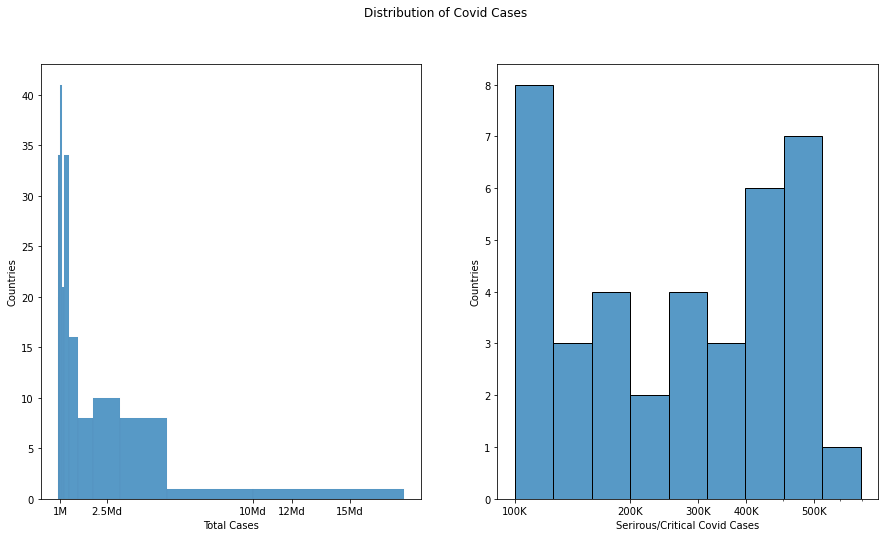

In [53]:
fig, ax =plt.subplots(ncols =2,figsize =[15,8])
log_binsize = 0.25
bins = 10 ** np.arange(5, np.log10(df_final['total_cases'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'total_cases',bins = bins,ax=ax[0])
#plt.xlim(xlimx,xlimy)
#plt.yticks(tick,tick_label)
#ax[0].set_xscale('log')
ax[0].set_xlabel('Total Cases')
ax[0].set_ylabel('Countries')
ax[0].set_xticks([1e6, 2.5e7,10e7, 12e7, 15e7] )
ax[0].set_xticklabels(['1M', '2.5Md','10Md', '12Md', '15Md'])
log_binsize = 0.1
bins = 10 ** np.arange(5, np.log10(df_final['serious_critical'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'serious_critical', bins = bins,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('Serirous/Critical Covid Cases')
ax[1].set_ylabel('Countries')
ax[1].set_xticks([1e5, 2e5,3e5, 4e5, 6e5] )
ax[1].set_xticklabels(['100K', '200K','300K', '400K', '500K'])
plt.suptitle('Distribution of Covid Cases')
plt.show()

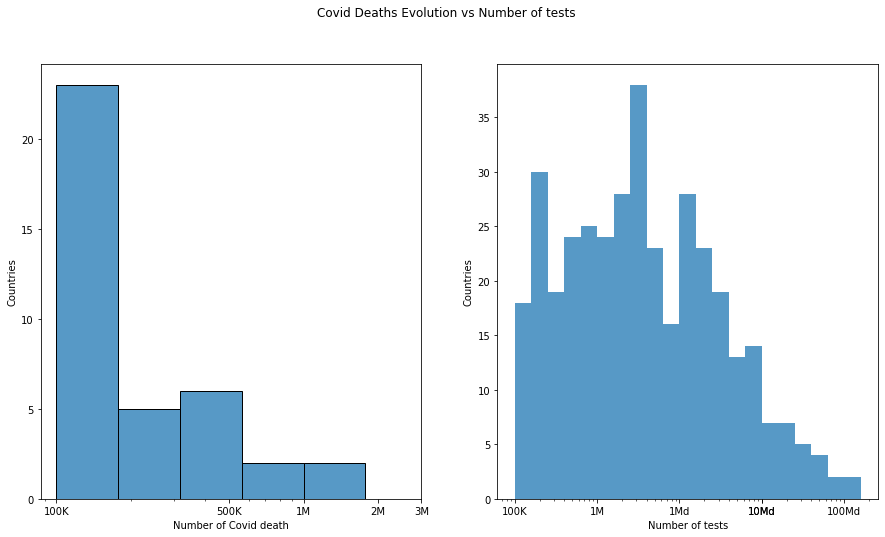

In [54]:
fig, ax =plt.subplots(ncols =2,figsize =[15,8])
log_binsize = 0.25
bins = 10 ** np.arange(5, np.log10(df_final['total_death'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'total_death',bins = bins,ax=ax[0])
#plt.xlim(xlimx,xlimy)
#plt.yticks(tick,tick_label)
ax[0].set_xscale('log')
ax[0].set_xlabel('Number of Covid death')
ax[0].set_xticks([100000, 500000,1000000, 2e6, 3e6] )
ax[0].set_xticklabels(['100K', '500K','1M', '2M', '3M'])
ax[0].set_ylabel('Countries')
log_binsize = 0.2
bins = 10 ** np.arange(5, np.log10(df_final['total_tests'].max())+log_binsize, log_binsize)
sb.histplot(data = df_final, x = 'total_tests', bins = bins,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('Number of tests')
ax[1].set_ylabel('Countries')
ax[1].set_xticks([100000, 1e6,100e6, 1e7, 10e7, 100e7] )
ax[1].set_xticklabels(['100K', '1M','100M', '1Md','10Md','100Md'])
plt.suptitle('Covid Deaths Evolution vs Number of tests')
plt.show()

That's clear that refered to the current situation,the world cases decrease a lot due to the effect of vaccins and health measures. That's more explicit with the logaritmic scope. The distribution is bimodal and shows that in 2019 most of countries were touched. The number de covid tests and deaths decreased from 2019 to 2022.

#### Bivariate Exploration
I have some hypothesis to check, logically the number of cases detected would impact directly the number of recovered and deaths. I expect also that the population is responsible of high number of cases.

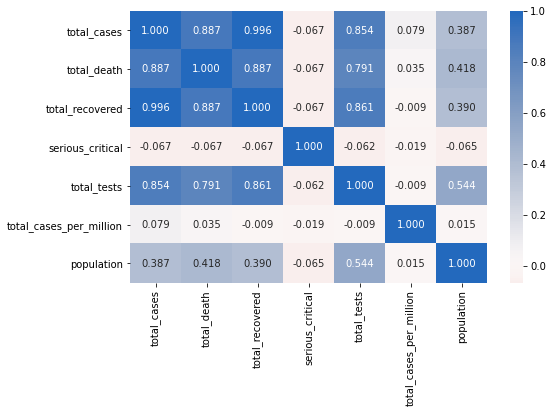

In [55]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_final[['total_cases', 'total_death','total_recovered','serious_critical','total_tests','total_cases_per_million','population']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

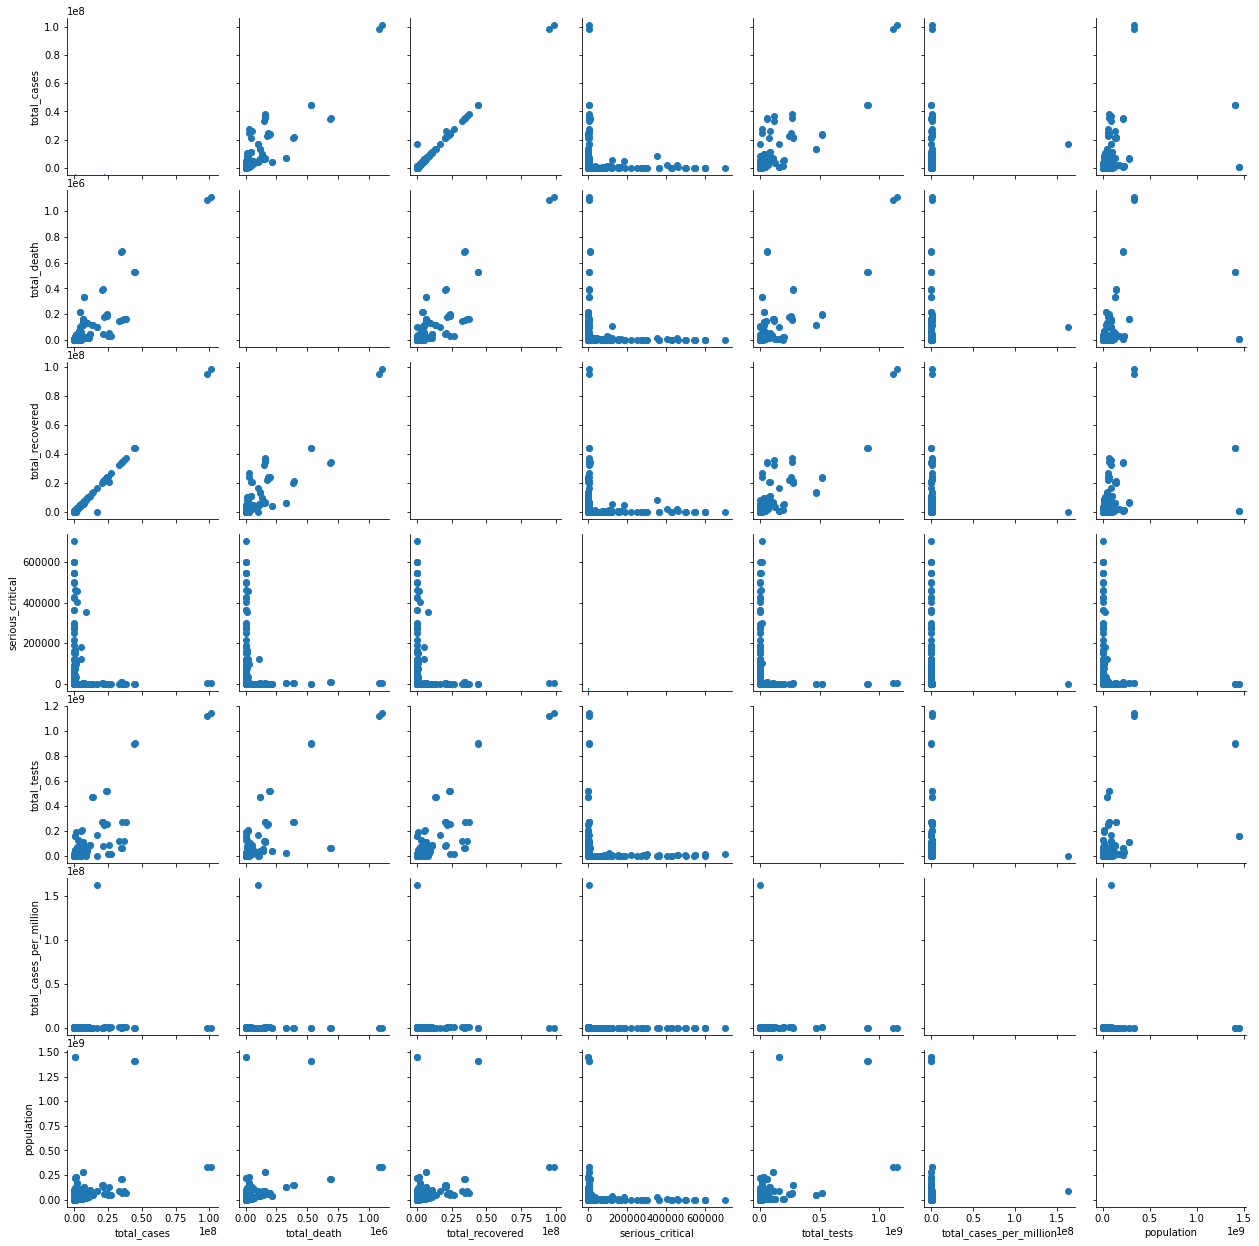

In [56]:
g = sb.PairGrid(data = df_final, vars = ['total_cases', 'total_death','total_recovered','serious_critical','total_tests','total_cases_per_million','population'])
g = g.map_diag(plt.hist, bins = 100000);
g.map_offdiag(plt.scatter)

We have basic interactions between number of cases , the number of tests and recovered. The number of recovered is proporionnal to covid cases detected. I will divide the total cases per million into categories to reflect the color zones affected during Covid expansion. 

In [57]:
#Let's build categorical 
# list of conditions
conditions = [
    (df_final['total_cases_per_million'] <= 100),
    ((df_final['total_cases_per_million'] > 100) & (df_final['total_cases_per_million'] <= 1000)),
    ((df_final['total_cases_per_million'] > 1000) & (df_final['total_cases_per_million'] <= 100000)),
    (df_final['total_cases_per_million'] > 100000) 
    ]

# Persona class for each condition
values = ['Green_Zone','Orange_Zone','Red_Zone','Red_Scarlet_Zone']

df_final['Cov_zone'] = np.select(conditions, values)

In [58]:
df_final.head()

,Id,country,total_cases,total_death,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_million,deaths_per_million,total_tests,tests_per_million,population,continent,year,Cov_zone
0,1,USA,101213638,1109394,0,98461586,1642658,3746,302306,3314,1144042147,3417037,334805269,North America,2022,Red_Scarlet_Zone
1,2,India,44675509,530653,0,44139558,5298,698,31761,377,907809042,645378,1406631776,Asia,2022,Red_Zone
2,3,France,38331430,159517,0,37128030,1043883,869,584459,2432,271490188,4139547,65584518,Europe,2022,Red_Scarlet_Zone
3,4,Germany,36726061,158851,0,36042800,524410,1406,437822,1894,122332384,1458359,83883596,Europe,2022,Red_Scarlet_Zone
4,5,Brazil,35563044,690739,0,34354889,517416,8318,165138,3207,63776166,296146,215353593,South America,2022,Red_Scarlet_Zone


In [59]:
#Let's separate variables
numerical_vars = ['total_cases','total_death','total_tests','serious_critical', 'total_recovered']
categorical_vars =['continent','Cov_zone','year']

C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From versio

<Figure size 1152x720 with 0 Axes>

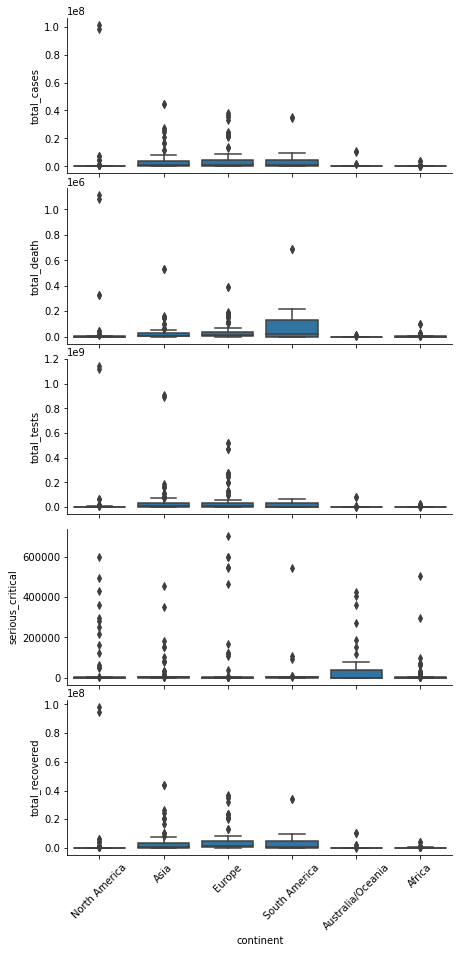

In [60]:
# plot matrix of numeric features against categorical features.

def bargrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
        

plt.figure(figsize = [16, 10])
g = sb.PairGrid(data = df_final, y_vars = numerical_vars, x_vars = categorical_vars[0],
                size = 2.5, aspect = 2.5)
plt.xticks(rotation = 45)
g.map(bargrid)
plt.show()

As we can see, the higher covid cases are in Europe followed by South America, Asia, North America, Oceania//Australia  and finally the Africa. But for this last, we have very few tests performed inside, that's probably the main reason why we haven't a lot of cases. We can also remark that the serious or critical cases are in Oceania, probably the recent results of Covid variant `Omicron` these 2 last year 2021-2022.

C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From versio

<Figure size 1152x720 with 0 Axes>

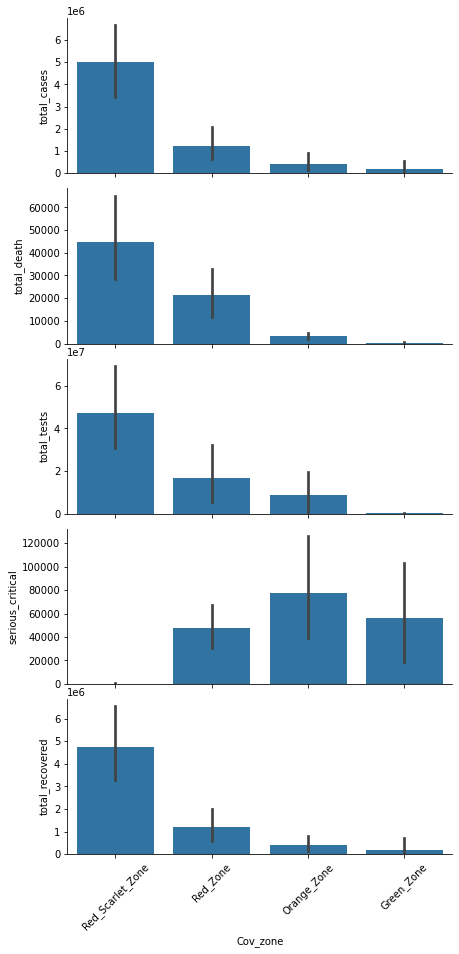

In [61]:
# plot matrix of numeric features against categorical features.

def bargrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.barplot(x, y, color = default_color)
        

plt.figure(figsize = [16, 10])
g = sb.PairGrid(data = df_final, y_vars = numerical_vars, x_vars = categorical_vars[1],
                size = 2.5, aspect = 2.5)
plt.xticks(rotation = 45)
g.map(bargrid)
plt.show()

The split of countries based on total cases per million is very interesting. The famous Red scarlet Zone (>=100K cases per million inhabitants) count the highers number of death and total cases. More visible here, the number of deaths increase proportionnaly to number of cases per million inhabitants. Contrary with the number of recovered. There, we can thank the vaccine, we avoided a lot of deaths in Red scarlet zone.

(0.0, 200000000.0)

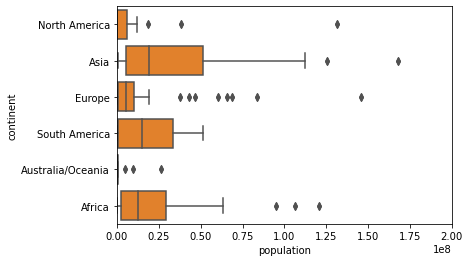

In [62]:
default_color = sb.color_palette()[1]
sb.boxplot(data=df_final, y ='continent' ,x ='population', color = default_color)
plt.xlim(0, 0.2e9)



<AxesSubplot:xlabel='population', ylabel='continent'>

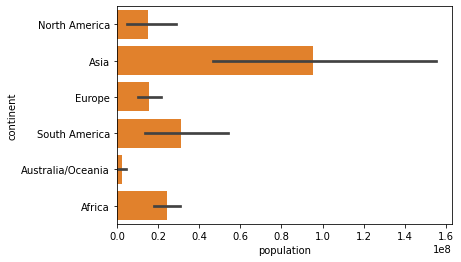

In [63]:
sb.barplot(data=df_final, y ='continent' ,x ='population', color = default_color)

C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From versio

<Figure size 1152x720 with 0 Axes>

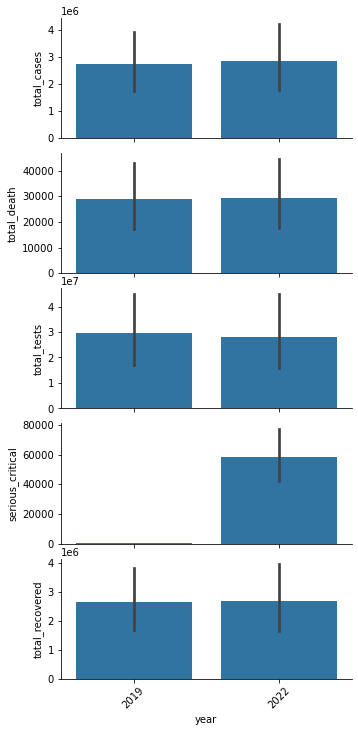

In [75]:
# plot matrix of numeric features against categorical features.

def bargrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.barplot(x, y, color = default_color)
        

plt.figure(figsize = [16, 10])
g = sb.PairGrid(data = df_final, y_vars = numerical_vars, x_vars = categorical_vars[2],
                size = 2, aspect = 2.5)
plt.xticks(rotation = 45)
g.map(bargrid)
plt.show()

In 2019, we hadn't critical cases but a lot of deaths. Fortunately the vaccine came and contains a little the effects of virus. But we encountered through some virurents covid variants. The number of deaths have not enough decreased betweeen 2019 and 2022. The current global world situation looks not better than when covid began. The covid still present. 

## Let's see deepy the comparison between 2019 and 2022 
### Covid cases per continent and per zone

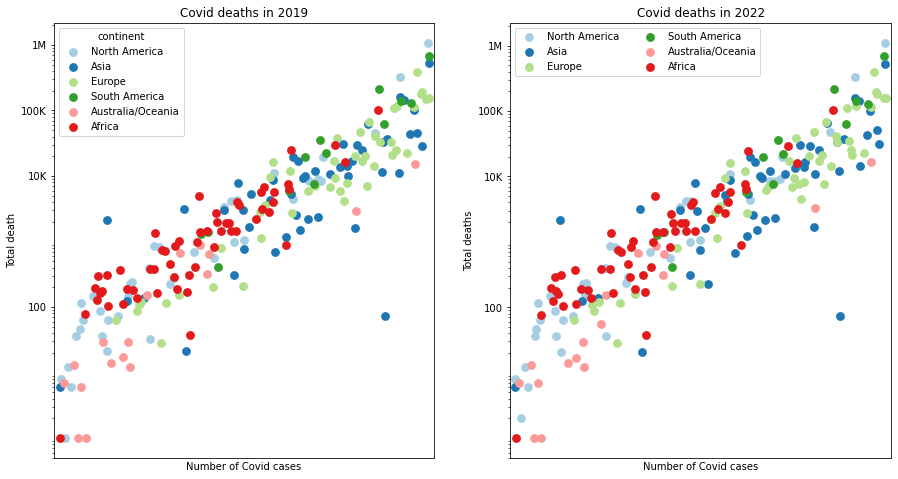

In [66]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'total_death', hue = 'continent',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[0])
ax[0].set_title('Covid deaths in 2019')
ax[0].set_ylabel('Total death')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'total_death', hue = 'continent',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[1])
ax[1].set_title('Covid deaths in 2022')
ax[1].set_ylabel('Total deaths')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

There is no big differences between the number of deaths in 2019 and 2022. But that a good point. That proves the efficiency of vaccines and health barrier measures. We arrived to contain the mortal side of virus.

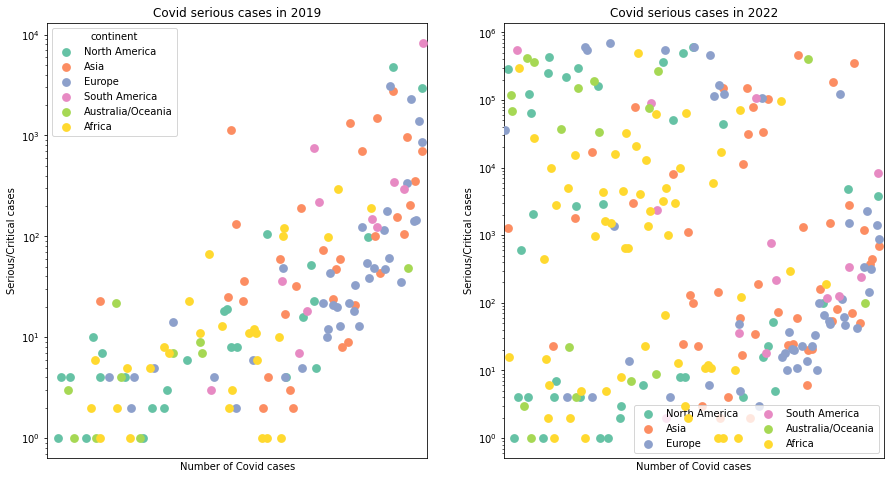

In [68]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'serious_critical', hue = 'continent',
           palette = 'Set2',linestyles='',dodge = 6,errorbar=None, ax=ax[0])
ax[0].set_title('Covid serious cases in 2019')
ax[0].set_ylabel('Serious/Critical cases')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
#ax[0].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
#ax[0].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'serious_critical', hue = 'continent',
           palette = 'Set2',linestyles='',dodge = 6,errorbar=None, ax=ax[1])
ax[1].set_title('Covid serious cases in 2022')
ax[1].set_ylabel('Serious/Critical cases')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
#ax[1].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
#ax[1].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

The number of critical cases exploded in 2022, especially in many african countries and in Europe.

In [65]:
cov_rep = df_final[['country','total_cases','total_death','total_tests','population','total_recovered','continent','year','serious_critical','Cov_zone']].sort_values('total_cases',ascending = False ).reset_index()
cov_rep.head(20)

,index,country,total_cases,total_death,total_tests,population,total_recovered,continent,year,serious_critical,Cov_zone
0,0,USA,101213638,1109394,1144042147,334805269,98461586,North America,2022,3746,Red_Scarlet_Zone
1,228,USA,98166904,1084282,1118158870,334805269,94962112,North America,2019,2970,Red_Scarlet_Zone
2,1,India,44675509,530653,907809042,1406631776,44139558,Asia,2022,698,Red_Zone
3,229,India,44587307,528629,894416853,1406631776,44019095,Asia,2019,698,Red_Zone
4,2,France,38331430,159517,271490188,65584518,37128030,Europe,2022,869,Red_Scarlet_Zone
5,3,Germany,36726061,158851,122332384,83883596,36042800,Europe,2022,1406,Red_Scarlet_Zone
6,4,Brazil,35563044,690739,63776166,215353593,34354889,South America,2022,8318,Red_Scarlet_Zone
7,230,France,35342950,155078,271490188,65584518,34527115,Europe,2019,869,Red_Scarlet_Zone
8,231,Brazil,34706757,686027,63776166,215353593,33838636,South America,2019,8318,Red_Scarlet_Zone
9,232,Germany,33312373,149948,122332384,83883596,32315200,Europe,2019,1406,Red_Scarlet_Zone


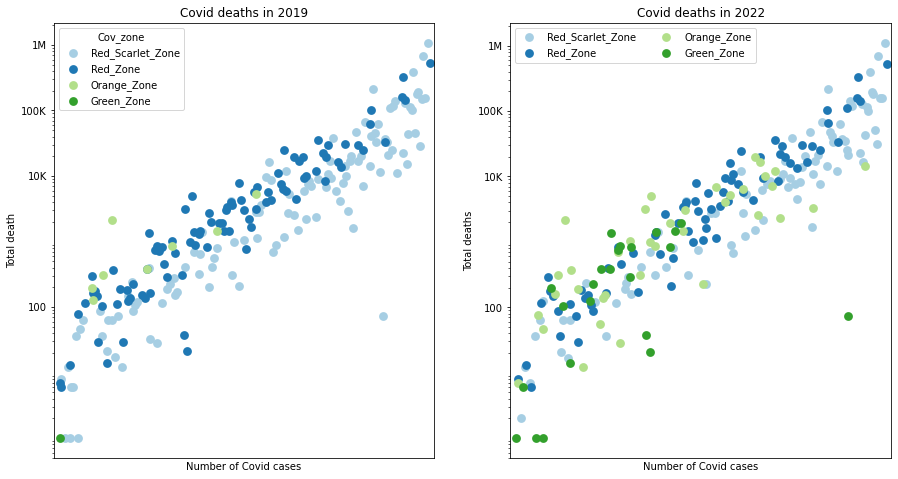

In [80]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'total_death', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[0])
ax[0].set_title('Covid deaths in 2019')
ax[0].set_ylabel('Total death')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'total_death', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 6,errorbar=None, ax=ax[1])
ax[1].set_title('Covid deaths in 2022')
ax[1].set_ylabel('Total deaths')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

The number of deaths exploded in 2022 in orange zone (>100 and <1000 cases per million inhabitants). 

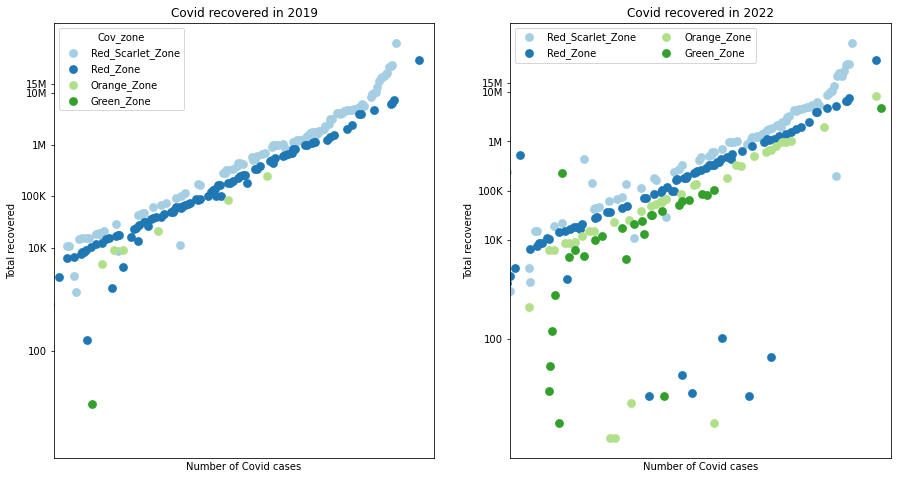

In [79]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'total_recovered', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[0])
ax[0].set_title('Covid recovered in 2019')
ax[0].set_ylabel('Total recovered')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'total_recovered', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[1])
ax[1].set_title('Covid recovered in 2022')
ax[1].set_ylabel('Total recovered')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

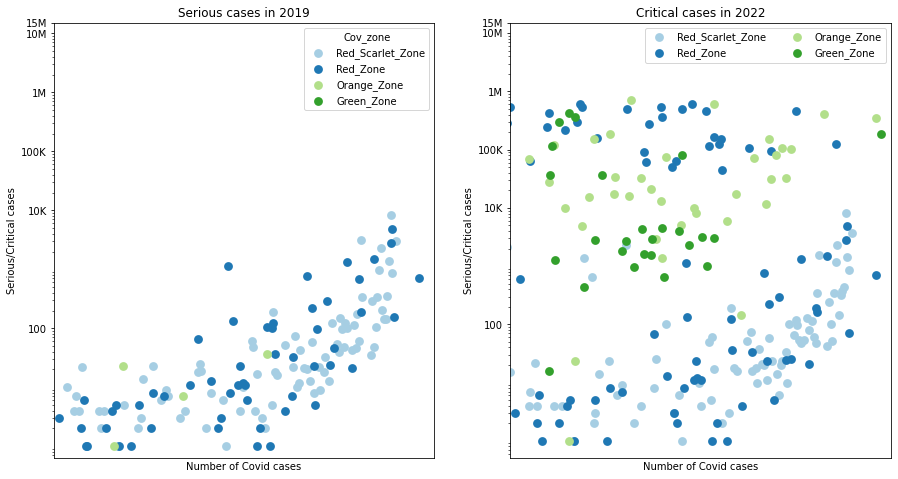

In [82]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data =cov_rep[cov_rep['year']== 2019], x = 'total_cases', y = 'serious_critical', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[0])
ax[0].set_title('Serious cases in 2019')
ax[0].set_ylabel('Serious/Critical cases')
ax[0].set_yscale('log')
ax[0].set_xlabel('Number of Covid cases')
ax[0].set_xticks([])
plt.xticks(rotation =45)
ax[0].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[0].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data =cov_rep[cov_rep['year']== 2022], x = 'total_cases', y = 'serious_critical', hue = 'Cov_zone',
           palette = 'Paired',linestyles='',dodge = 45,errorbar=None, ax=ax[1])
ax[1].set_title('Critical cases in 2022')
ax[1].set_ylabel('Serious/Critical cases')
#plt.xticks(rotation =45)
ax[1].set_xticks([])
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of Covid cases')
ax[1].set_yticks([100,10000, 100000, 1e6,10e6,15e6] )
ax[1].set_yticklabels([ '100','10K', '100K', '1M','10M','15M'])
#ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

We can see that the number of critical cases has increased in the orange zone and in the red zone. Probably, the people who unfortunately could not resist died.